In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

from sklearn.linear_model import LogisticRegression




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path="/content/drive/MyDrive/cubic_zirconia.csv"

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
data = pd.read_csv("/content/drive/MyDrive/cubic_zirconia.csv")

# New Section

In [124]:
data.head().T

,0,1,2,3,4
Unnamed: 0,1,2,3,4,5
carat,0.3,0.33,0.9,0.42,0.31
cut,Ideal,Premium,Very Good,Ideal,Ideal
color,E,G,E,F,F
clarity,SI1,IF,VVS2,VS1,VVS1
depth,62.1,60.8,62.2,61.6,60.4
table,58.0,58.0,60.0,56.0,59.0
x,4.27,4.42,6.04,4.82,4.35
y,4.29,4.46,6.12,4.8,4.43
z,2.66,2.7,3.78,2.96,2.65


In [125]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [13]:
print('shape of the dataset :', data.shape)

shape of the dataset : (26967, 11)


In [14]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [126]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [127]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [128]:
data.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [129]:
data.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [130]:
data['depth'].median()

61.8

In [131]:
data = data.fillna(data['depth'].median())

In [132]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [133]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [134]:
data.drop_duplicates(inplace=True) 


In [135]:
data['cut'].value_counts()

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64

In [136]:
data['color'].value_counts()


G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64

In [137]:
data['clarity'].value_counts()

SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64

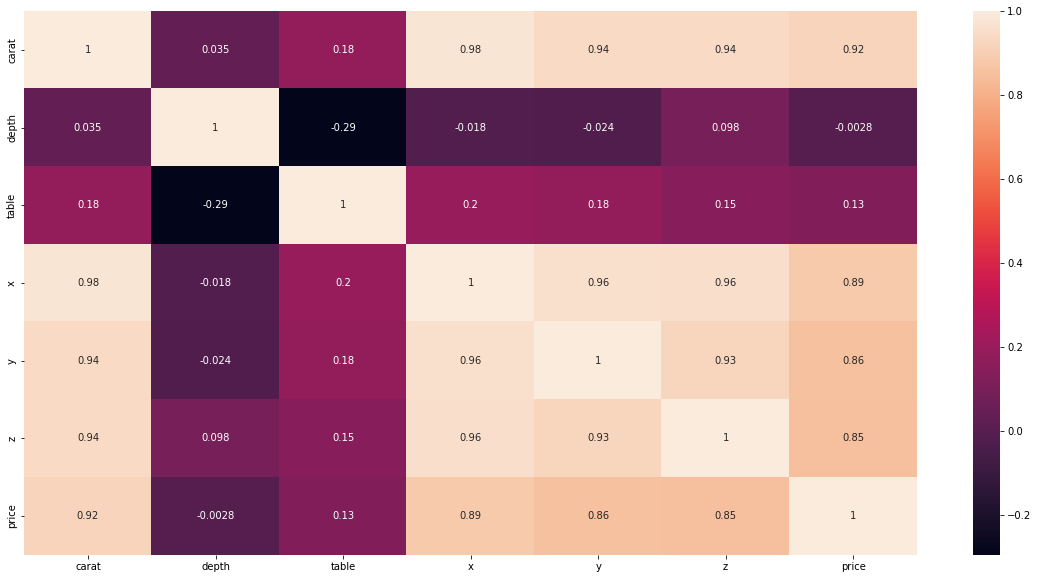

In [138]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), annot = True, ax = ax)
plt.show()

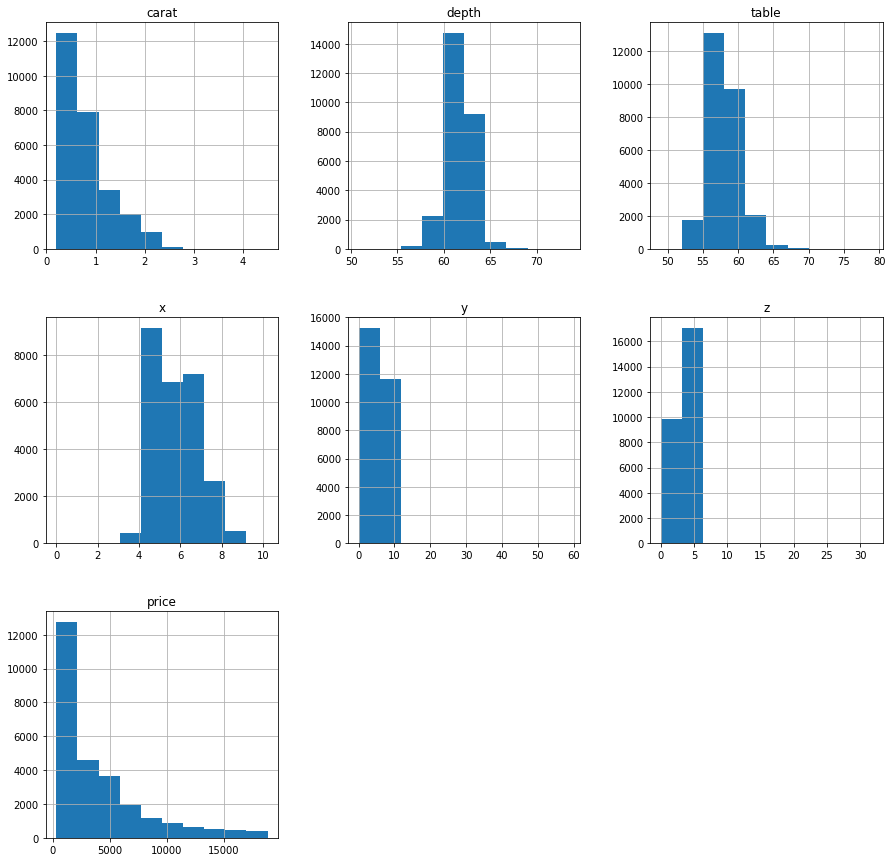

In [139]:
data.hist(figsize=(15,15))
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


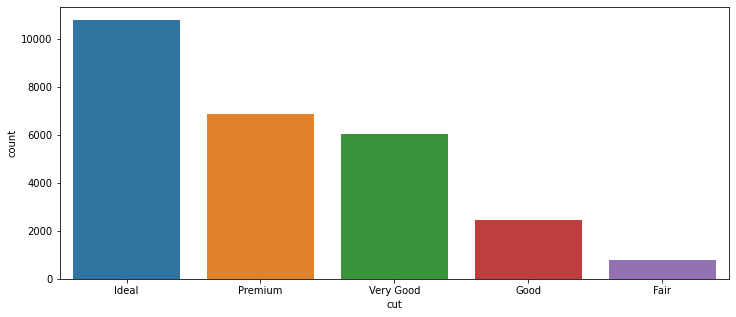

In [140]:
plt.figure(figsize = (12,5))
sns.countplot('cut',data = data, order = data['cut'].value_counts().index)
plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


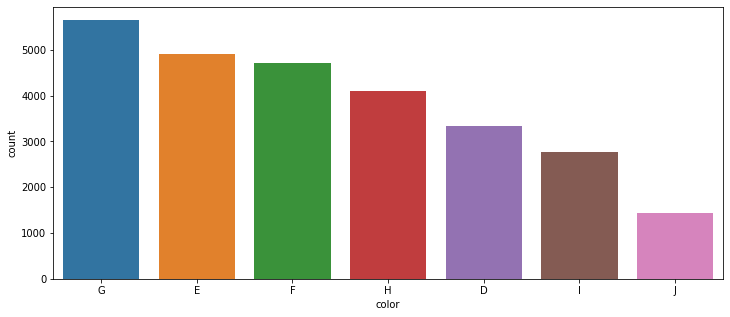

In [141]:

plt.figure(figsize = (12,5))
sns.countplot('color',data = data, order = data['color'].value_counts().index)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


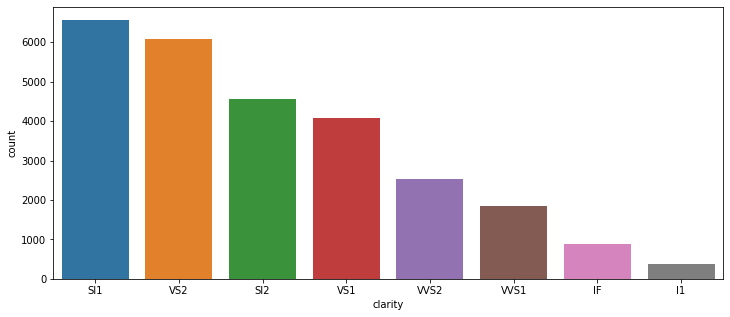

In [142]:

plt.figure(figsize = (12,5))
sns.countplot('clarity',data = data, order = data['clarity'].value_counts().index)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


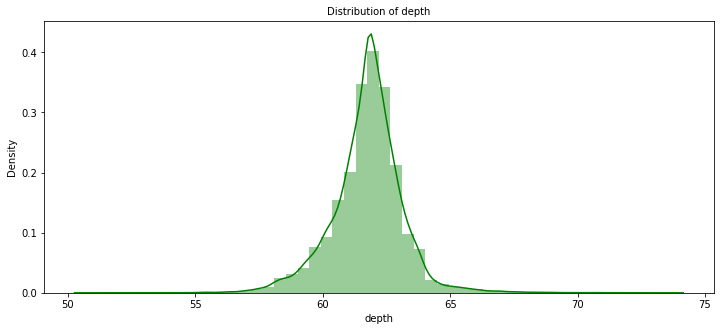

In [143]:
plt.figure(figsize = (12,5))
sns.distplot(data['depth'], color='green')
plt.title('Distribution of depth', fontsize = 10)
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


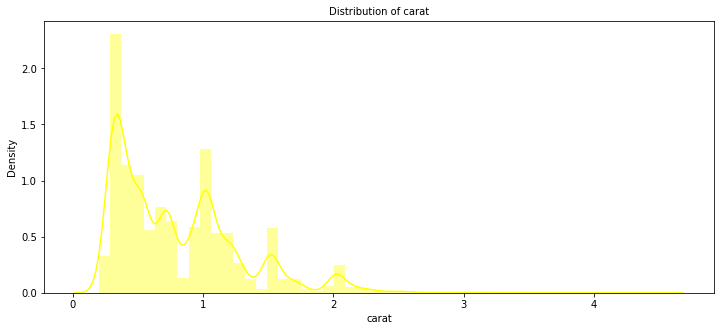

In [144]:
plt.figure(figsize = (12,5))
sns.distplot(data['carat'], color='Yellow')
plt.title('Distribution of carat', fontsize = 10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


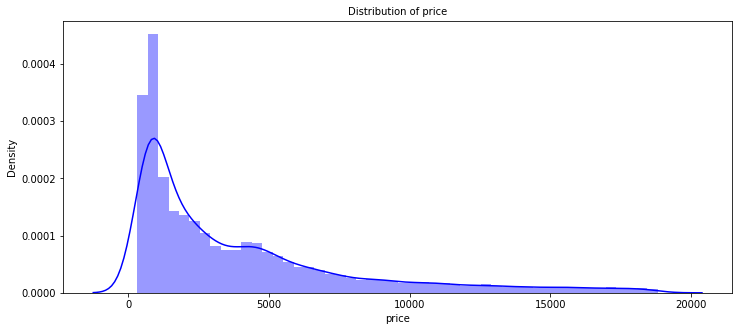

In [145]:
plt.figure(figsize = (12,5))
sns.distplot(data['price'], color='blue')
plt.title('Distribution of price', fontsize = 10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


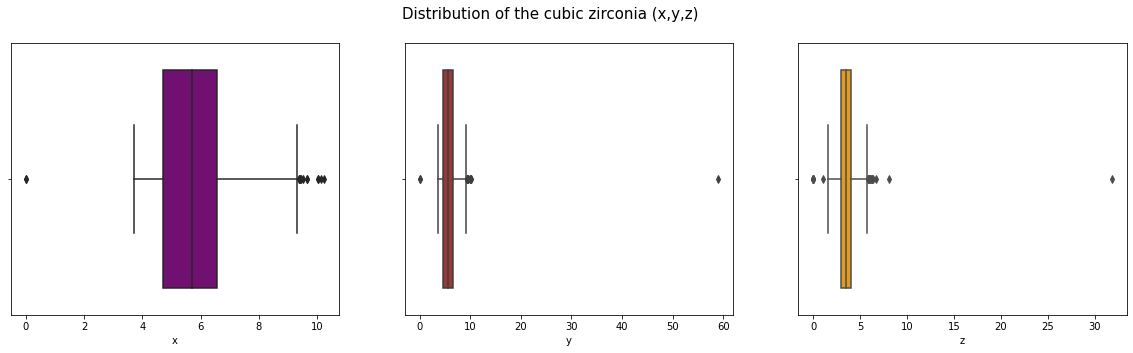

In [146]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.boxplot(data['x'], color='Purple')

plt.subplot(132)
sns.boxplot(data['y'], color='Brown')

plt.subplot(133)
sns.boxplot(data['z'], color='orange')

plt.suptitle('Distribution of the cubic zirconia (x,y,z)', fontsize = 15)
plt.show()


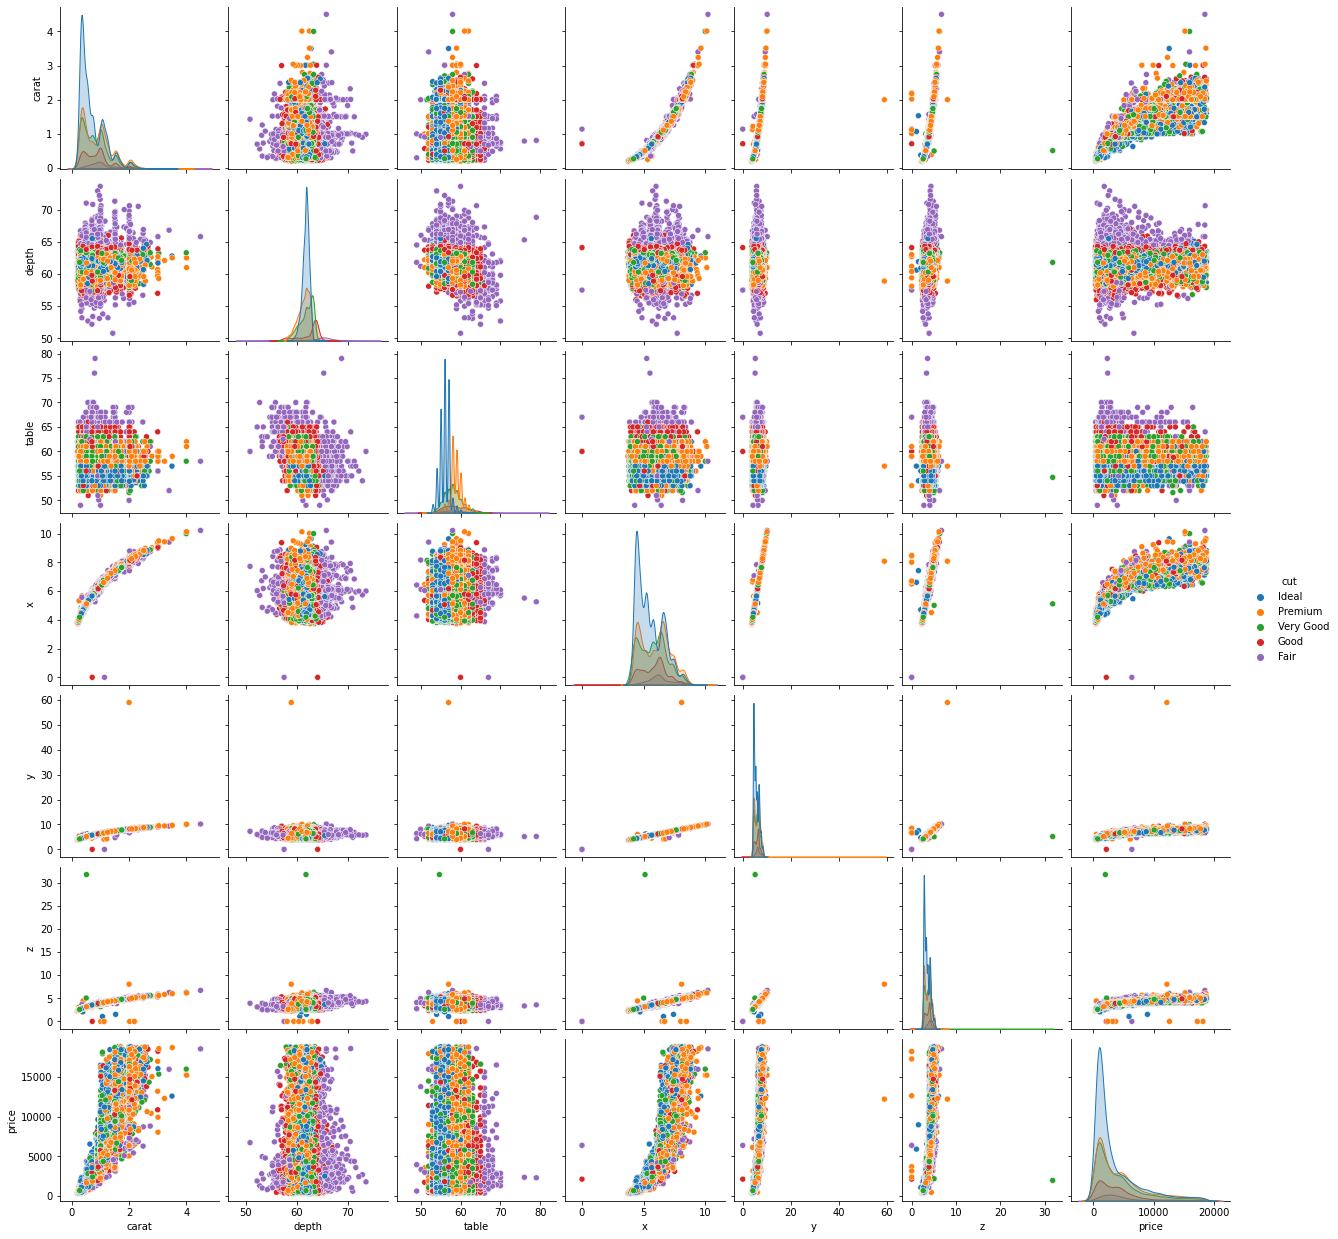

In [147]:
sns.pairplot(data, hue = 'cut')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


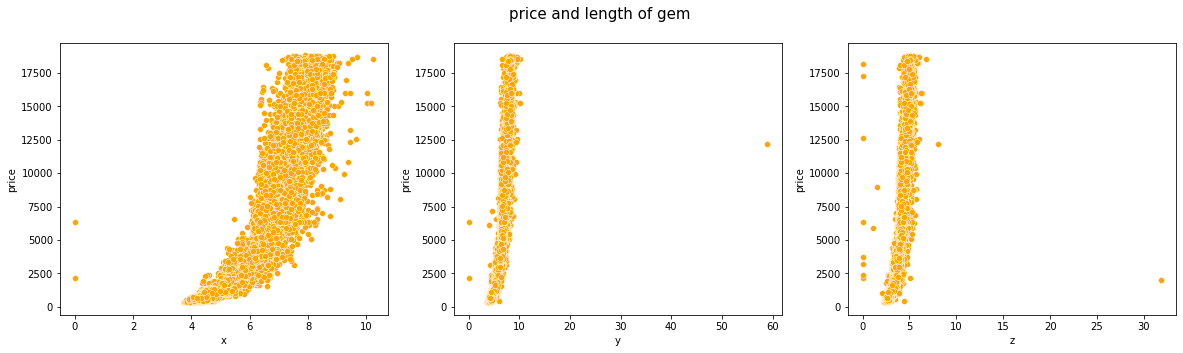

In [148]:
plt.rcParams['figure.figsize']= 20,5
plt.subplot(131)
sns.scatterplot(data['x'], data['price'], color='orange')

plt.subplot(132)
sns.scatterplot(data['y'], data['price'], color='orange')

plt.subplot(133)
sns.scatterplot(data['z'], data['price'], color='orange')

plt.suptitle('price and length of gem', fontsize = 15)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


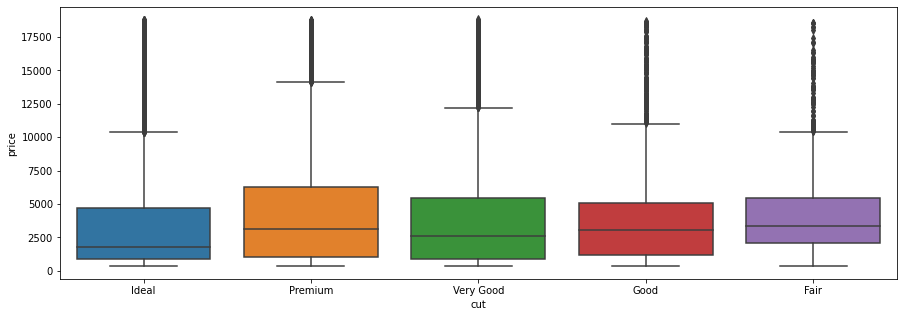

In [149]:
plt.figure(figsize = (15,5))
sns.boxplot(data['cut'], data['price'])
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


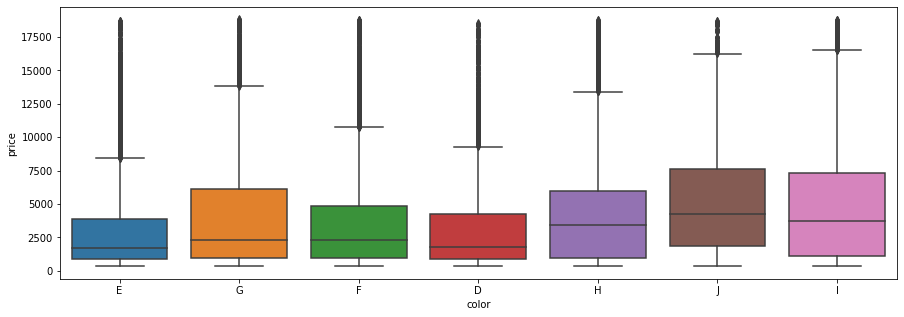

In [150]:
plt.figure(figsize = (15,5))
sns.boxplot(data['color'], data['price'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


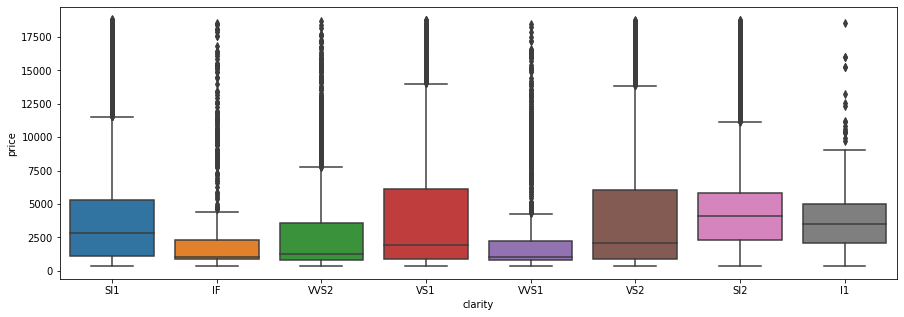

In [151]:
plt.figure(figsize = (15,5))
sns.boxplot(data['clarity'], data['price'])
plt.show()

In [152]:
data.head()
data['cut'] = data['cut'].map({'Ideal':1,'Good':2,'Very Good':3,'Premium':4,'Fair':5})

In [153]:
d=data

In [162]:
d.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,1,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,1,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,1,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [167]:
dff = pd.get_dummies(d, columns = ['color','clarity'])


In [168]:
dff.head()

,carat,cut,depth,table,x,y,z,price,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,1,62.1,58.0,4.27,4.29,2.66,499,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.33,4,60.8,58.0,4.42,4.46,2.70,984,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0.90,3,62.2,60.0,6.04,6.12,3.78,6289,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.42,1,61.6,56.0,4.82,4.80,2.96,1082,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0.31,1,60.4,59.0,4.35,4.43,2.65,779,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [171]:
model_data = dff[['carat','table','cut','color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2','price']]
from sklearn.model_selection import train_test_split
x = model_data.drop('price', axis=1)

In [172]:
x.head()

,carat,table,cut,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,58.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0.33,58.0,4,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0.90,60.0,3,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0.42,56.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0.31,59.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0


In [173]:
y = model_data[['price']]

In [174]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [175]:
from sklearn.linear_model import LinearRegression

In [183]:
regr = LinearRegression()
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))
y_pred=regr.predict(x_test)

0.9177458594578433


In [191]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1162.3082796556969
